Market Basket Analysis is a technique which identifies the strength of association between pairs of products purchased together and identify patterns of co-occurrence. 

Market Basket Analysis creates If-Then scenario rules, for example, if item A is purchased then item B is likely to be purchased. The rules are probabilistic in nature or, in other words, they are derived from the frequencies of co-occurrence in the observations. Frequency is the proportion of baskets that contain the items of interest.

The rules can be used in pricing strategies, product placement, and various types of cross-selling strategies.

Market Basket analysis is particularly useful for physical retail stores as it can help in planning floor space and product placement amongst many other benefits.

In this project, the recommendation using Apriori and FP Growth will be demonstrated over a large dataset.

Lastly the comparison of both algorithms will be made and also which algorithm to be used under which situation will be described

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
#import seaborn as sns 
import warnings
import matplotlib as mpl
%matplotlib inline

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [3]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [4]:
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Exploratory Data Analysis (EDA)

In [5]:
df=pd.read_csv('Supermart.csv')

In [6]:
df.shape

(269720, 74)

In [7]:
df.head()

,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales,city,state_province,country,customer_region_id,yearly_income,gender,total_children,num_children_at_home,education,date_accnt_opened,member_card,occupation,houseowner,num_cars_owned,product_class_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth,subcategory,category,department,family,store_type,region_id,store_name,store_number,store_street_address,store_city,store_state,store_postal_code,store_country,store_manager,store_phone,store_fax,first_opened_date,last_remodel_date,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,sales_city,sales_state_province,sales_district,sales_region,sales_country,sales_district_id,the_date,the_day,the_year,the_month,day_of_month,day_since_epoch
0,337,371,6280,2,1.50,0.5100,2,Anacortes,WA,USA,79,$30K - $50K,F,5,0,High School Degree,14-01-1993,Bronze,Skilled Manual,Y,3,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.40,21.6,4.76,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,02-04-1970 00:00,04-06-1973 00:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,05-01-1997,Sunday,1997,1,5,33973
1,963,371,4018,2,2.40,0.7200,1,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07-05-1992,Silver,Management,Y,2,58,Just Right,Just Right Chicken Noodle Soup,22934378981,2.40,20.50,18.50,1,1,6,13,6.68,10.6,9.16,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,02-04-1970 00:00,04-06-1973 00:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,05-01-1997,Sunday,1997,1,5,33973
2,1512,371,6280,2,1.62,0.6318,3,Anacortes,WA,USA,79,$30K - $50K,F,5,0,High School Degree,14-01-1993,Bronze,Skilled Manual,Y,3,5,Jardon,Jardon Spaghetti,53042894005,0.54,13.70,10.60,1,0,28,13,12.80,12.6,9.81,Pasta,Starchy Foods,Starchy Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,02-04-1970 00:00,04-06-1973 00:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,05-01-1997,Sunday,1997,1,5,33973
3,181,371,4018,2,2.79,1.0323,3,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07-05-1992,Silver,Management,Y,2,61,High Top,High Top Lettuce,79397689700,0.93,16.10,14.10,0,1,23,5,16.10,15.1,14.50,Fresh Vegetables,Vegetables,Produce,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,02-04-1970 00:00,04-06-1973 00:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,05-01-1997,Sunday,1997,1,5,33973
4,483,371,4382,2,3.88,1.7072,2,Anacortes,WA,USA,79,$130K - $150K,F,0,0,Graduate Degree,25-07-1992,Silver,Management,N,2,61,Tell Tale,Tell Tale Corn on the Cob,80806578993,1.94,13.00,10.00,1,0,3,10,20.80,21.6,5.86,Fresh Vegetables,Vegetables,Produce,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,02-04-1970 00:00,04-06-1973 00:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,05-01-1997,Sunday,1997,1,5,33973


## Data Exploration

In [8]:
df.describe()

,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales,customer_region_id,total_children,num_children_at_home,num_cars_owned,product_class_id,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth,region_id,store_number,store_postal_code,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,sales_district_id,the_year,the_month,day_of_month,day_since_epoch
count,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,2.697200e+05,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.0,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000
mean,783.862873,800.004990,5119.390405,12.753730,6.542142,2.618622,3.090201,57.723454,2.535351,0.816091,2.205632,54.382471,5.563373e+10,2.117859,13.797998,11.786979,0.560911,0.353956,18.897490,9.469887,12.903214,12.938429,12.963582,39.894947,12.753730,55555.0,28975.729082,19957.547653,5450.413325,3567.816298,0.623484,0.295265,0.614471,0.553111,0.594839,120.811319,1997.678048,6.661100,15.109970,34402.004990
std,447.926131,201.955563,2901.883077,6.349746,3.461318,1.452805,0.835554,29.973844,1.490679,1.292423,1.111834,30.846176,2.580783e+10,0.930726,4.623687,4.684530,0.496277,0.478197,10.244825,2.637010,5.759837,5.844580,5.608001,32.813184,6.349746,0.0,5830.618714,4306.565245,1601.140519,1007.121215,0.484513,0.456163,0.486721,0.497172,0.490924,6.222520,0.467226,3.514326,8.319021,201.955563
min,1.000000,367.000000,3.000000,1.000000,0.500000,0.153000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.003103e+10,0.500000,6.000000,3.050000,0.000000,0.000000,1.000000,5.000000,3.010000,3.000000,3.000000,1.000000,1.000000,55555.0,20319.000000,13305.000000,2452.000000,1635.000000,0.000000,0.000000,0.000000,0.000000,0.000000,110.000000,1997.000000,1.000000,1.000000,33969.000000
25%,396.000000,657.000000,2570.000000,7.000000,3.810000,1.498000,3.000000,26.000000,1.000000,0.000000,1.000000,30.000000,3.341941e+10,1.420000,9.670000,7.710000,0.000000,0.000000,10.000000,7.000000,7.860000,7.880000,8.320000,18.000000,7.000000,55555.0,23598.000000,16232.000000,4357.000000,3164.000000,0.000000,0.000000,0.000000,0.000000,0.000000,116.000000,1997.000000,4.000000,8.000000,34259.000000
50%,787.000000,830.000000,5090.000000,13.000000,5.940000,2.386500,3.000000,66.000000,3.000000,0.000000,2.000000,58.000000,5.639667e+10,2.130000,13.600000,11.600000,1.000000,0.000000,19.000000,9.000000,12.900000,12.800000,12.900000,25.000000,13.000000,55555.0,30268.000000,20141.000000,5188.000000,3375.000000,1.000000,0.000000,1.000000,1.000000,1.000000,120.000000,1998.000000,7.000000,15.000000,34432.000000
75%,1174.000000,968.000000,7614.000000,17.000000,8.670000,3.486000,4.000000,85.000000,4.000000,1.000000,3.000000,79.000000,7.797237e+10,2.790000,17.700000,16.000000,1.000000,1.000000,28.000000,12.000000,17.700000,18.200000,17.600000,76.000000,17.000000,55555.0,33858.000000,22271.000000,6954.000000,3755.000000,1.000000,1.000000,1.000000,1.000000,1.000000,125.000000,1998.000000,10.000000,22.000000,34570.000000
max,1559.000000,1095.000000,10281.000000,24.000000,23.640000,10.290000,6.000000,109.000000,5.000000,5.000000,4.000000,110.000000,9.998368e+10,3.980000,21.900000,20.800000,1.000000,1.000000,36.000000,14.000000,22.900000,22.900000,22.900000,106.000000,24.000000,55555.0,39696.000000,30351.000000,9184.000000,6122.000000,1.000000,1.000000,1.000000,1.000000,1.000000,133.000000,1998.000000,12.000000,30.000000,34697.000000


Let's include categorical features also in description

In [9]:
df.describe(include='all')

,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales,city,state_province,country,customer_region_id,yearly_income,gender,total_children,num_children_at_home,education,date_accnt_opened,member_card,occupation,houseowner,num_cars_owned,product_class_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth,subcategory,category,department,family,store_type,region_id,store_name,store_number,store_street_address,store_city,store_state,store_postal_code,store_country,store_manager,store_phone,store_fax,first_opened_date,last_remodel_date,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,sales_city,sales_state_province,sales_district,sales_region,sales_country,sales_district_id,the_date,the_day,the_year,the_month,day_of_month,day_since_epoch
count,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720,269720,269720,269720.000000,269720,269720,269720.000000,269720.000000,269720,269720,269720,269720,269720,269720.000000,269720.000000,269720,269720,2.697200e+05,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720,269720,269720,269720,269720,269720.000000,269720,269720.000000,269720,269720,269720,269720.0,269720,269720,269720,269720,269720,269720,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720,269720,269720,269720,269720,269720.000000,269720,269720,269720.000000,269720.000000,269720.000000,269720.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107,12,3,NaN,8,2,NaN,NaN,5,1633,4,5,2,NaN,NaN,111,1559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102,45,22,3,5,NaN,24,NaN,24,23,10,NaN,3,22,24,24,24,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,10,21,7,3,NaN,673,7,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hidalgo,WA,USA,NaN,$30K - $50K,F,NaN,NaN,Partial High School,16-10-1993,Bronze,Professional,Y,NaN,NaN,Hermanos,Moms Roasted Chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fresh Vegetables,Vegetables,Produce,Food,Supermarket,NaN,Store 13,NaN,5179 Valley Ave,Salem,WA,NaN,USA,Inmon,977-555-2724,977-555-2721,13-04-1957 00:00,10-11-1997 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Salem,WA,Los Angeles,North West,USA,NaN,07-12-1998,Thursday,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16684,86855,180823,NaN,88422,136181,NaN,NaN,81536,954,151261,87867,163137,NaN,NaN,8071,225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20859,32919,38041,193728,118341,NaN,25865,NaN,25865,25865,86855,NaN,180823,25865,25865,25865,25865,25865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25865,86855,31501,130006,180823,NaN,1377,40685,NaN,NaN,NaN,NaN
mean,783.862873,800.004990,5119.390405,12.753730,6.542142,2.618622,3.090201,NaN,NaN,NaN,57.723454,NaN,NaN,2.535351,0.816091,NaN,NaN,NaN,NaN,NaN,2.205632,54.382471,NaN,NaN,5.563373e+10,2.117859,13.797998,11.786979,0.560911,0.353956,18.897490,9.469887,12.903214,12.938429,12.963582,NaN,NaN,NaN,NaN,NaN,39.894947,NaN,12.753730,NaN,NaN,NaN,55555.0,NaN,NaN,NaN,NaN,NaN,NaN,28975.729082,19957.547653,5450.413325,3567.816298,0.623484,0.295265,0.614471,0.553111,0.594839,NaN,NaN,NaN,NaN,NaN,120.811319,NaN,NaN,1997.678048,6.661100,15.109970,34402.004990
std,447.926131,201.955563,2901.883077,6.349746,3.461318,1.452805,0.835554,NaN,NaN,NaN,29.973844,NaN,NaN,1.490679,1.292423,NaN,NaN,NaN,NaN,NaN,1.111834,30.846176,NaN,NaN,2.580783e+10,0.930726,4.623687,4.684530,0.496277,0.478197,10.244825,2.637010,5.759837,5.844580,5.608001,NaN,NaN,NaN,NaN,NaN,32.813184,NaN,6.349746,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,5830.618714,4306.565245,1601.140519,1007.121215,0.484513,0.456163,0.486721,0.497172,0.490924,NaN,NaN,NaN,NaN,NaN,6.222520,NaN,NaN,0.467226,3.514326,8.319021,201.955563
min,1.000000,367.000000,3.000000,1.000000,0.500000,0.153000,1.000000,NaN,NaN,NaN,1.000000,Na

In [10]:
df.isnull().sum()

product_id              0
time_id                 0
customer_id             0
store_id                0
store_sales             0
store_cost              0
unit_sales              0
city                    0
state_province          0
country                 0
customer_region_id      0
yearly_income           0
gender                  0
total_children          0
num_children_at_home    0
education               0
date_accnt_opened       0
member_card             0
occupation              0
houseowner              0
num_cars_owned          0
product_class_id        0
brand_name              0
product_name            0
SKU                     0
SRP                     0
gross_weight            0
net_weight              0
recyclable_package      0
low_fat                 0
units_per_case          0
cases_per_pallet        0
shelf_width             0
shelf_height            0
shelf_depth             0
subcategory             0
category                0
department              0
family      

In [11]:
df.dtypes

product_id                int64
time_id                   int64
customer_id               int64
store_id                  int64
store_sales             float64
store_cost              float64
unit_sales                int64
city                     object
state_province           object
country                  object
customer_region_id        int64
yearly_income            object
gender                   object
total_children            int64
num_children_at_home      int64
education                object
date_accnt_opened        object
member_card              object
occupation               object
houseowner               object
num_cars_owned            int64
product_class_id          int64
brand_name               object
product_name             object
SKU                       int64
SRP                     float64
gross_weight            float64
net_weight              float64
recyclable_package        int64
low_fat                   int64
units_per_case            int64
cases_pe

There is no missing value, also the data type seems to be fine

#### For further analysis lets identify the unique values for different varibales

In [12]:
temp_table = pd.DataFrame(index=df.columns)
temp_table['data_type']=df.dtypes
temp_table['unique_count']=df.nunique()
temp_table

,data_type,unique_count
product_id,int64,1559
time_id,int64,673
customer_id,int64,8842
store_id,int64,24
store_sales,float64,1069
store_cost,float64,12535
unit_sales,int64,6
city,object,107
state_province,object,12
country,object,3


### Univariate Analysis

Histograms



Frequency plot of store

Text(0.5, 0, 'store_id')

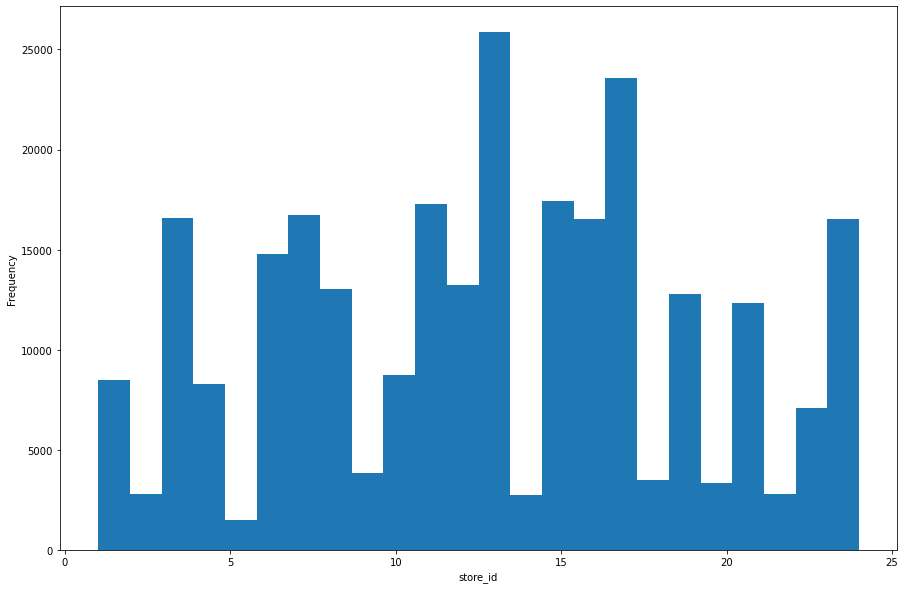

In [13]:
fig=plt.figure(figsize=(15,10))
df['store_id'].plot.hist(bins = 24)
plt.xlabel('store_id')

Here we can see, few stores registers more sales, while some registers low sales also, which may be due to different store size

Frequency plot of product_class_id

Text(0.5, 0, 'product_class_id')

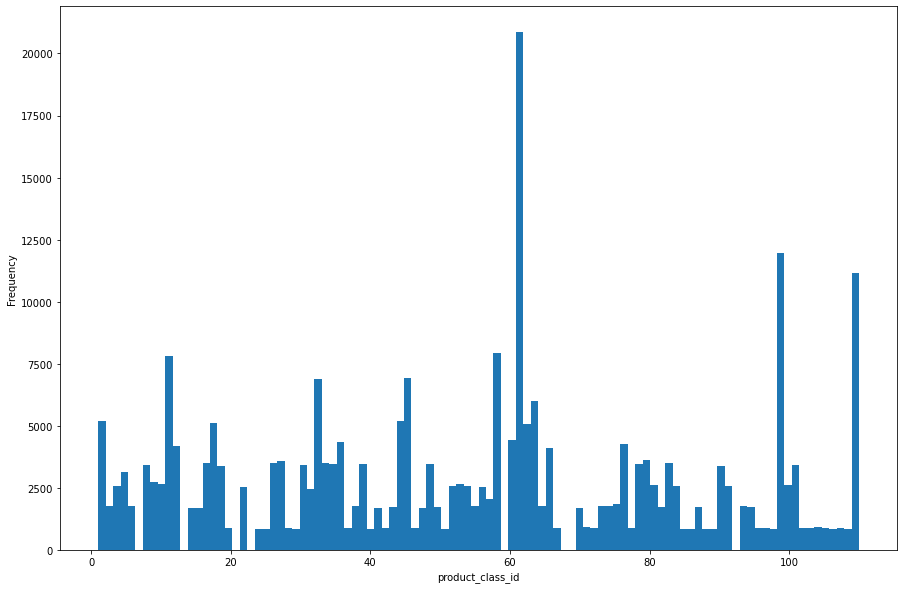

In [14]:
fig=plt.figure(figsize=(15,10))
df['product_class_id'].plot.hist(bins = 102)
plt.xlabel('product_class_id')

One product class id registers highest sell, while other registers average sales, while few records for very low sales, which further needed to be explored

Frequency Plot Of Product Id

Text(0.5, 0, 'product id')

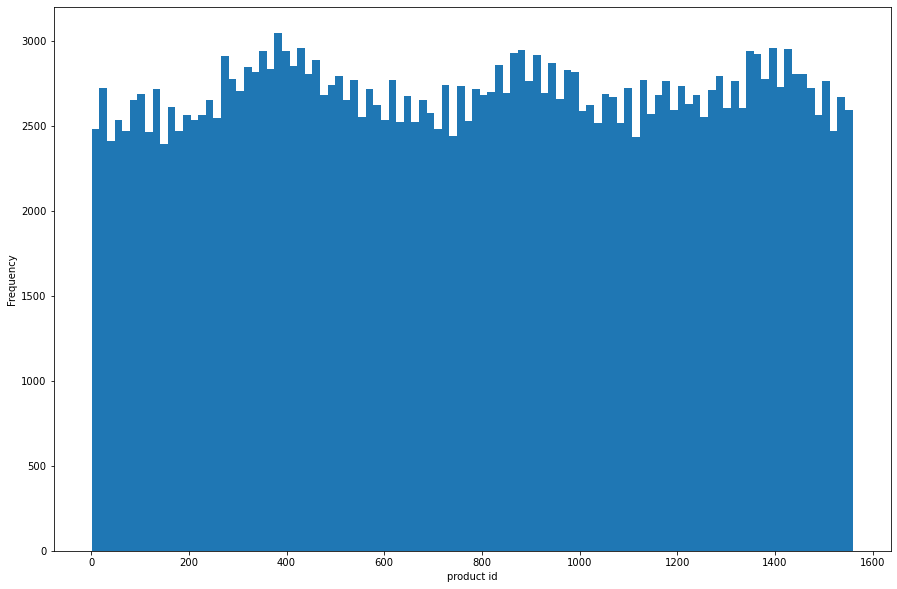

In [15]:
fig=plt.figure(figsize=(15,10))
df['product_id'].plot.hist(bins = 100)
plt.xlabel('product id')

Looking at individual sales of products, sales distribution seems to be uniform

Frequency Plot Of Unit Sales

Text(0.5, 0, 'Unit Sales')

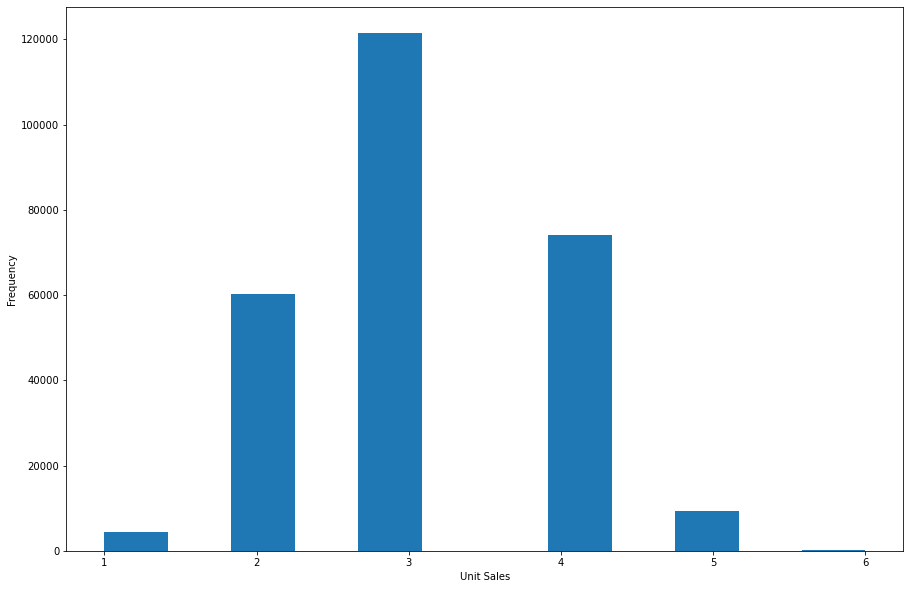

In [16]:
fig=plt.figure(figsize=(15,10))
df['unit_sales'].plot.hist(bins = 12)
plt.xlabel('Unit Sales')

This represents the no of units thats have been sold for the product, here we can see mostly people buys 3 of a kind, followed by 4 and 2, while chances of buying a single product and 6 products are rare 

### Lets Explore the seasonal buying behaviour

Month

Text(0.5, 0, 'Month')

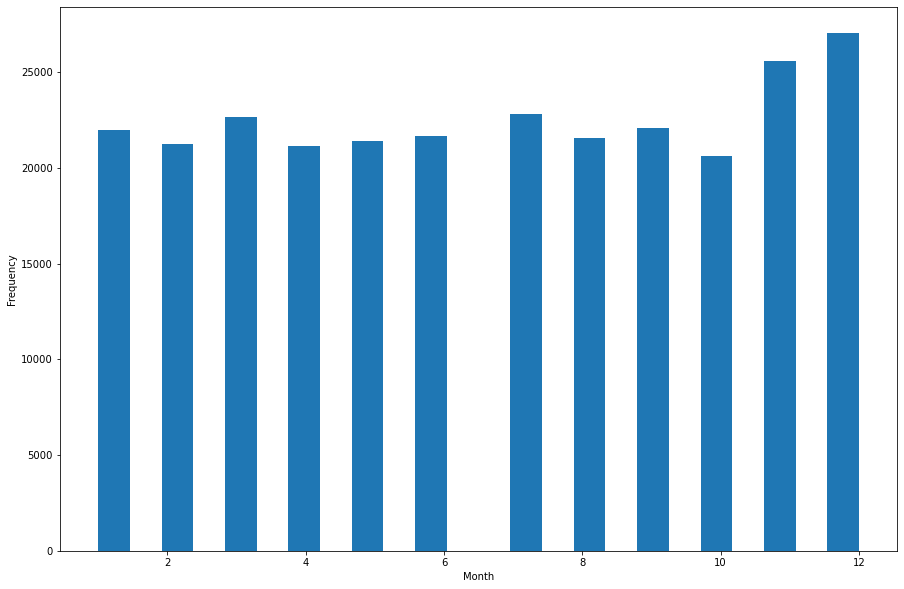

In [17]:
fig=plt.figure(figsize=(15,10))
df['the_month'].plot.hist(bins=24)
plt.xlabel('Month')

During the months of November and December, the sales seems to be marginally high, may be due to holidays

Day Of Month

Text(0.5, 0, 'Day of month')

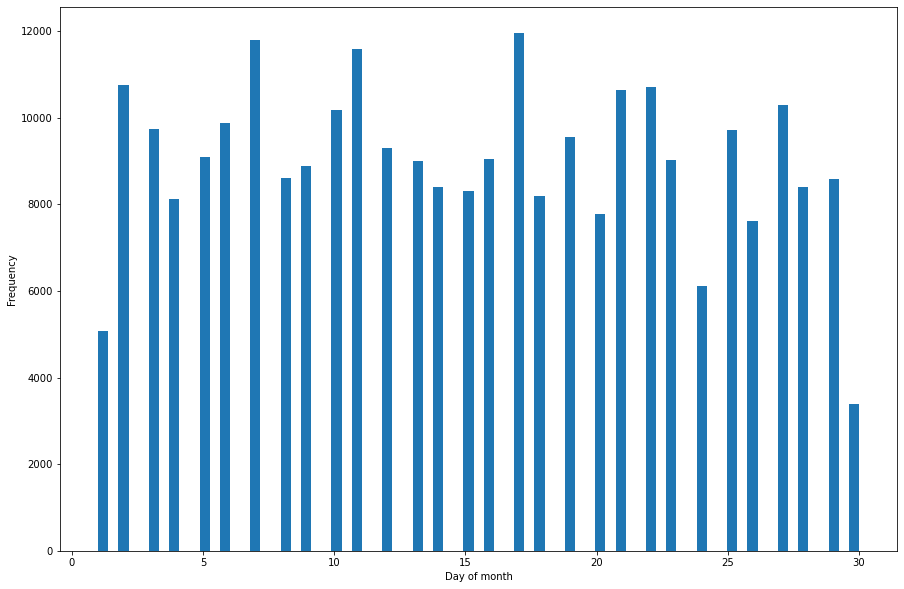

In [18]:
fig=plt.figure(figsize=(15,10))
df['day_of_month'].plot.hist(bins=75)
plt.xlabel('Day of month')

First and last day of the month registers lower sales, while few days of the month registers more sales compared to other

Day Of Week

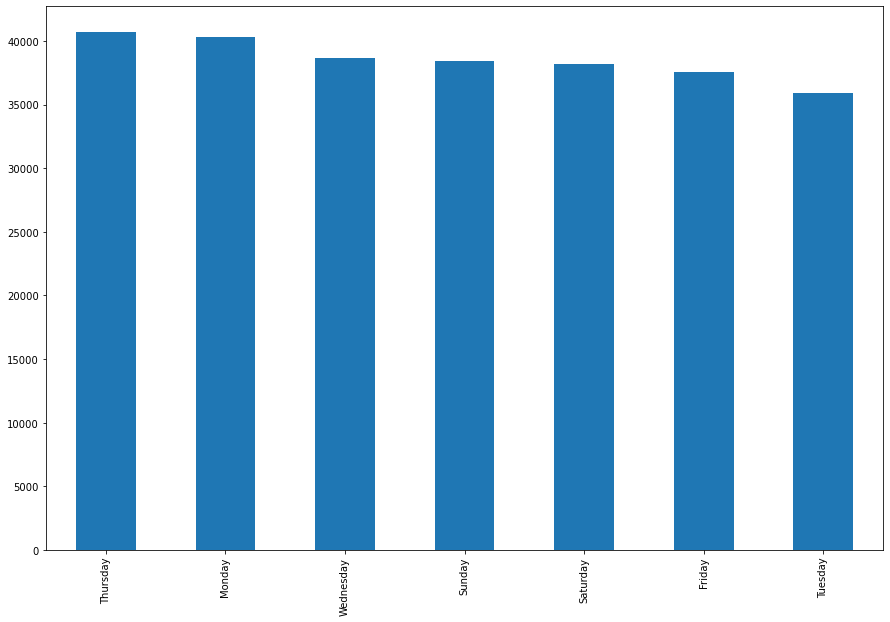

In [19]:
df_day_freq=df['the_day'].value_counts()
fig=plt.figure(figsize=(15, 10))
df_day_freq.plot.bar() 

### Highest Ordered

Most Ordered Products

In [20]:
df['product_name'].value_counts()

Moms Roasted Chicken                           225
Tell Tale Fresh Lima Beans                     219
Steady Whitening Toothpast                     218
Hilltop Silky Smooth Hair Conditioner          216
Nationeel Dried Apples                         214
Steady Childrens Cold Remedy                   214
Hilltop Mint Mouthwash                         213
Sunset Economy Toilet Brush                    213
Ebony Mixed Nuts                               213
Special Wheat Puffs                            212
Ebony Fresh Lima Beans                         211
Red Wing Glass Cleaner                         208
Hermanos Potatos                               208
BBB Best French Roast Coffee                   208
Big Time Orange Popsicles                      207
Great English Muffins                          207
Hermanos Green Pepper                          207
Better Chicken Noodle Soup                     207
Great Pumpernickel Bread                       207
BBB Best Apple Butter          

Most Ordered Products in Percentage

In [21]:
df['product_name'].value_counts()/len(df)*100

Moms Roasted Chicken                           0.083420
Tell Tale Fresh Lima Beans                     0.081195
Steady Whitening Toothpast                     0.080825
Hilltop Silky Smooth Hair Conditioner          0.080083
Nationeel Dried Apples                         0.079342
Steady Childrens Cold Remedy                   0.079342
Hilltop Mint Mouthwash                         0.078971
Sunset Economy Toilet Brush                    0.078971
Ebony Mixed Nuts                               0.078971
Special Wheat Puffs                            0.078600
Ebony Fresh Lima Beans                         0.078229
Red Wing Glass Cleaner                         0.077117
Hermanos Potatos                               0.077117
BBB Best French Roast Coffee                   0.077117
Big Time Orange Popsicles                      0.076746
Great English Muffins                          0.076746
Hermanos Green Pepper                          0.076746
Better Chicken Noodle Soup                     0

Most Visited Departments

In [22]:
df['department'].value_counts()

Produce                38041
Snack Foods            30983
Household              27590
Frozen Foods           27042
Baking Goods           20573
Canned Foods           19090
Dairy                  17195
Health and Hygiene     16643
Beverages              13624
Deli                   12130
Baked Goods             7951
Snacks                  6970
Alcoholic Beverages     6931
Starchy Foods           5198
Periodicals             4318
Eggs                    4099
Breakfast Foods         3462
Canned Products         1779
Meat                    1777
Checkout                1776
Seafood                 1688
Carousel                 860
Name: department, dtype: int64

### Most Visited Departments in Percentage

In [23]:
df['department'].value_counts()/len(df)*100

Produce                14.103886
Snack Foods            11.487098
Household              10.229127
Frozen Foods           10.025953
Baking Goods            7.627540
Canned Foods            7.077710
Dairy                   6.375130
Health and Hygiene      6.170473
Beverages               5.051164
Deli                    4.497256
Baked Goods             2.947872
Snacks                  2.584161
Alcoholic Beverages     2.569702
Starchy Foods           1.927184
Periodicals             1.600919
Eggs                    1.519724
Breakfast Foods         1.283553
Canned Products         0.659573
Meat                    0.658831
Checkout                0.658461
Seafood                 0.625834
Carousel                0.318849
Name: department, dtype: float64

Most Visited Subcategory

In [24]:
df['subcategory'].value_counts()

Fresh Vegetables      20859
Fresh Fruit           11972
Soup                   7919
Cheese                 7815
Dried Fruit            7758
Cookies                6930
Wine                   5189
Paper Wipes            5128
Canned Vegetables      5092
Frozen Vegetables      4435
Nuts                   4345
Chocolate Candy        4341
Milk                   4250
Preserves              4237
Chips                  4176
Eggs                   4099
Lightbulbs             3609
Sliced Bread           3586
Muffins                3517
Dips                   3506
Waffles                3501
Pizza                  3481
Cereal                 3462
Cooking Oil            3455
Personal Hygiene       3454
Batteries              3435
Deli Meats             3435
Juice                  3429
Popsicles              3393
Coffee                 3387
Soda                   3367
Pasta                  3148
Ice Cream              2736
Peanut Butter          2660
TV Dinner              2643
Deli Salads         

Most Visited Subcategory in Percentage

In [25]:
df['subcategory'].value_counts()/len(df)*100

Fresh Vegetables      7.733576
Fresh Fruit           4.438677
Soup                  2.936008
Cheese                2.897449
Dried Fruit           2.876316
Cookies               2.569331
Wine                  1.923847
Paper Wipes           1.901231
Canned Vegetables     1.887884
Frozen Vegetables     1.644298
Nuts                  1.610930
Chocolate Candy       1.609447
Milk                  1.575708
Preserves             1.570888
Chips                 1.548272
Eggs                  1.519724
Lightbulbs            1.338054
Sliced Bread          1.329527
Muffins               1.303945
Dips                  1.299867
Waffles               1.298013
Pizza                 1.290598
Cereal                1.283553
Cooking Oil           1.280958
Personal Hygiene      1.280587
Batteries             1.273543
Deli Meats            1.273543
Juice                 1.271318
Popsicles             1.257971
Coffee                1.255747
Soda                  1.248332
Pasta                 1.167136
Ice Crea

### Graphical Representation of Most Visited Sections

#### Most Visited Department

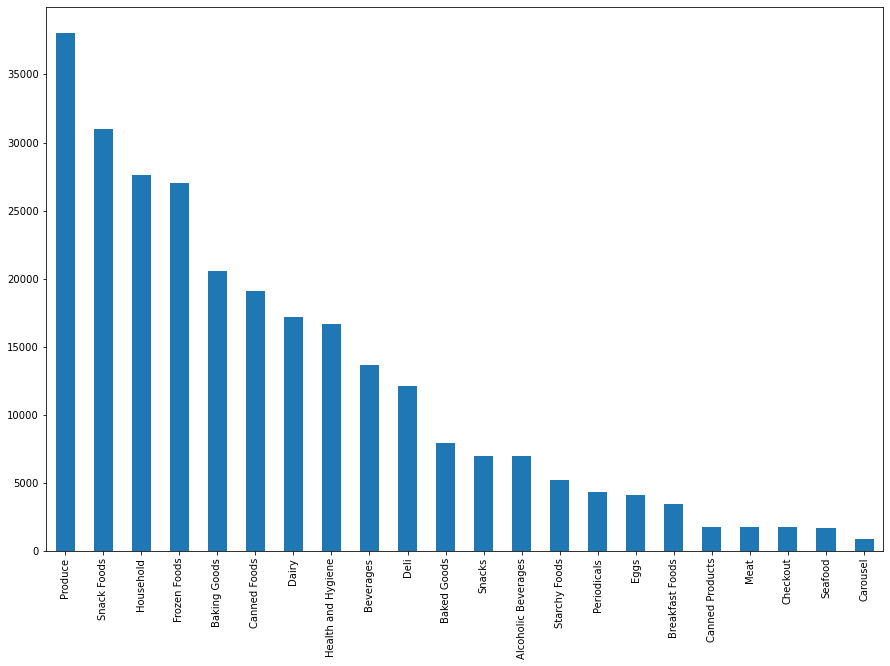

In [26]:
fig=plt.figure(figsize=(15,10))
df['department'].value_counts().plot(kind='bar')

#### 50 Most Visied Subcategories

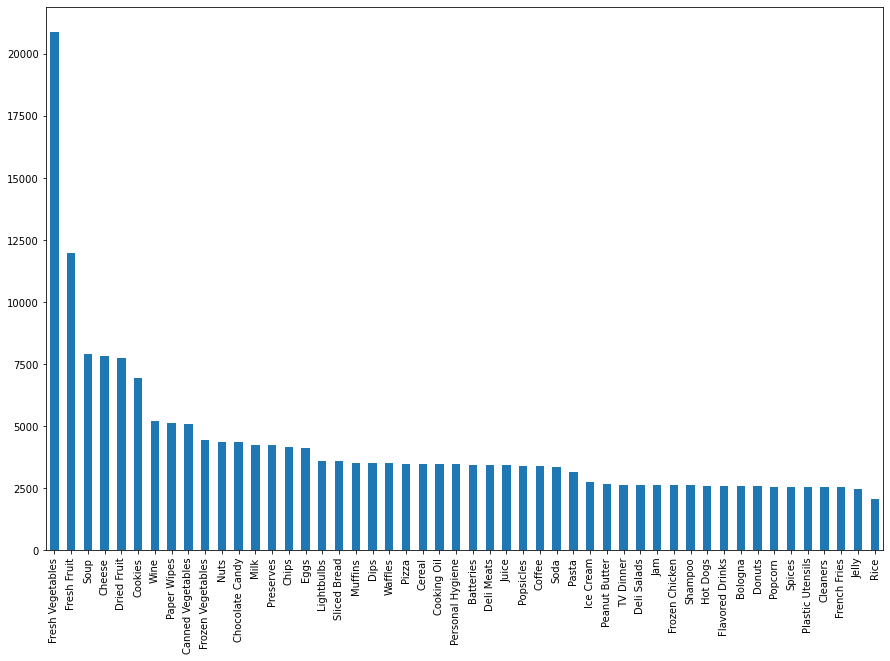

In [27]:
df_subcategory_freq=df['subcategory'].value_counts().iloc[:50]
fig=plt.figure(figsize=(15,10))
df_subcategory_freq.plot.bar()

#### 50 Most Bought Product

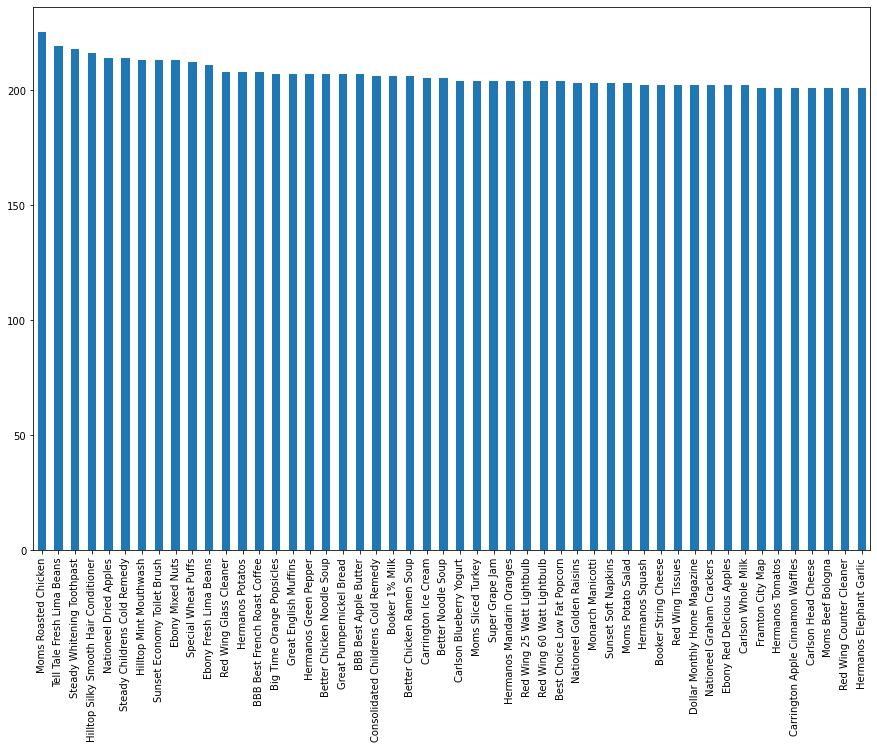

In [28]:
df_freq_products=df['product_name'].value_counts().iloc[:50]
fig=plt.figure(figsize=(15, 10))
df_freq_products.plot.bar()

## Bivariate Analysis

#### Bar Plot between customers and their products per order

In [29]:
unit_per_customer=df.groupby('customer_id')['unit_sales'].count()
unit_per_customer.head()

customer_id
3    30
5     1
6    16
8    42
9    13
Name: unit_sales, dtype: int64

segregating the units sold range to check the count of customers in different range of units

In [30]:
unit_sold_count = {}
for i in range(10):
    unit_sold_count[str(10*i)+'~'+str(10*(i+1))]=len([x for x in list(unit_per_customer) if x>=i*10 and x<(i+1)*10])
    
unit_sold_count

{'0~10': 2145,
 '10~20': 2509,
 '20~30': 1510,
 '30~40': 760,
 '40~50': 454,
 '50~60': 276,
 '60~70': 244,
 '70~80': 175,
 '80~90': 160,
 '90~100': 110}

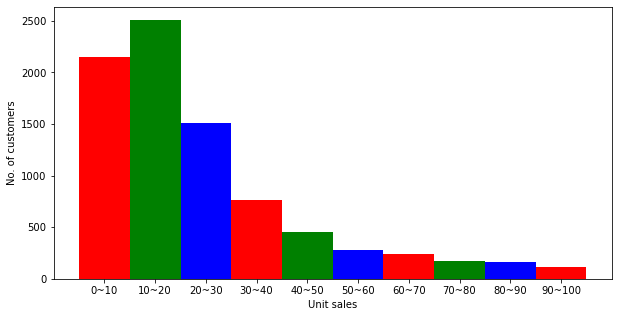

In [31]:
fig = plt.figure(figsize = (10, 5)) 
x_axis = tuple(unit_sold_count.keys())
y_axis = tuple(unit_sold_count.values())
plt.bar(x_axis, y_axis, color='rgb',width=1)  
plt.xlabel('Unit sales')  
plt.ylabel("No. of customers") 
plt.show()

Maximum of customers seems to purchase 10-20 no of products

#### Transaction ID -  transaction id which denotes items in a basket

Since in original dataset there is not transaction id is availabe, which will help to check the products purchased in a single transaction, lets create a transaction id using customer_id and time_id

In [32]:
df['transaction_id'] = df['customer_id'].astype(str) + df['time_id'].astype(str)

In [33]:
df.head()

,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales,city,state_province,country,customer_region_id,yearly_income,gender,total_children,num_children_at_home,education,date_accnt_opened,member_card,occupation,houseowner,num_cars_owned,product_class_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth,subcategory,category,department,family,store_type,region_id,store_name,store_number,store_street_address,store_city,store_state,store_postal_code,store_country,store_manager,store_phone,store_fax,first_opened_date,last_remodel_date,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,sales_city,sales_state_province,sales_district,sales_region,sales_country,sales_district_id,the_date,the_day,the_year,the_month,day_of_month,day_since_epoch,transaction_id
0,337,371,6280,2,1.50,0.5100,2,Anacortes,WA,USA,79,$30K - $50K,F,5,0,High School Degree,14-01-1993,Bronze,Skilled Manual,Y,3,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.40,21.6,4.76,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,02-04-1970 00:00,04-06-1973 00:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,05-01-1997,Sunday,1997,1,5,33973,6280371
1,963,371,4018,2,2.40,0.7200,1,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07-05-1992,Silver,Management,Y,2,58,Just Right,Just Right Chicken Noodle Soup,22934378981,2.40,20.50,18.50,1,1,6,13,6.68,10.6,9.16,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,02-04-1970 00:00,04-06-1973 00:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,05-01-1997,Sunday,1997,1,5,33973,4018371
2,1512,371,6280,2,1.62,0.6318,3,Anacortes,WA,USA,79,$30K - $50K,F,5,0,High School Degree,14-01-1993,Bronze,Skilled Manual,Y,3,5,Jardon,Jardon Spaghetti,53042894005,0.54,13.70,10.60,1,0,28,13,12.80,12.6,9.81,Pasta,Starchy Foods,Starchy Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,02-04-1970 00:00,04-06-1973 00:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,05-01-1997,Sunday,1997,1,5,33973,6280371
3,181,371,4018,2,2.79,1.0323,3,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07-05-1992,Silver,Management,Y,2,61,High Top,High Top Lettuce,79397689700,0.93,16.10,14.10,0,1,23,5,16.10,15.1,14.50,Fresh Vegetables,Vegetables,Produce,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,02-04-1970 00:00,04-06-1973 00:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,05-01-1997,Sunday,1997,1,5,33973,4018371
4,483,371,4382,2,3.88,1.7072,2,Anacortes,WA,USA,79,$130K - $150K,F,0,0,Graduate Degree,25-07-1992,Silver,Management,N,2,61,Tell Tale,Tell Tale Corn on the Cob,80806578993,1.94,13.00,10.00,1,0,3,10,20.80,21.6,5.86,Fresh Vegetables,Vegetables,Produce,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,02-04-1970 00:00,04-06-1973 00:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,05-01-1997,Sunday,1997,1,5,33973,4382371


In [34]:
df['customer_id'].nunique()

8842

In [35]:
df['time_id'].nunique()

673

In [36]:
df['transaction_id'].nunique()

58308

Since our dataset is large, and considering the market basket analysis lets create a separate dataframe of relevent columns only

Lets get the column transaction_id, customer_id, product_id, product_name to a new dataframe

In [37]:
order_data=df[['transaction_id', 'customer_id', 'product_id', 'product_name']]

In [38]:
order_data.head()

,transaction_id,customer_id,product_id,product_name
0,6280371,6280,337,Better Turkey Noodle Soup
1,4018371,4018,963,Just Right Chicken Noodle Soup
2,6280371,6280,1512,Jardon Spaghetti
3,4018371,4018,181,High Top Lettuce
4,4382371,4382,483,Tell Tale Corn on the Cob


In [39]:
order_data.nunique()

transaction_id    58308
customer_id        8842
product_id         1559
product_name       1559
dtype: int64

#### let's calculate average products bought by customer per order

In [40]:
temp_1=order_data.groupby('transaction_id')['product_id'].count()

In [41]:
temp_1=pd.DataFrame(temp_1)

In [42]:
temp_1.shape

(58308, 1)

In [43]:
temp_1['transaction_id']=list(temp_1.index)

In [44]:
temp_1.columns=['product_num','orderid']

In [45]:
temp_2=pd.merge(temp_1,df[['transaction_id','customer_id']],on='transaction_id',how='left')

In [46]:
order_per_customer=temp_2.groupby('customer_id')['product_num'].agg(['sum','count'])

In [47]:
order_per_customer['avg']=order_per_customer['sum']/order_per_customer['count']

In [48]:
order_per_customer.head()

,sum,count,avg
customer_id,,,
3,186,30,6.200000
5,1,1,1.000000
6,72,16,4.500000
8,208,42,4.952381
9,85,13,6.538462


Here we can see customer_id, then total no of items purchased in sum column, then count gives the number of visit of that customer and average is calculated, which gives the approximate quantity purchased by customer every visit

#### Let's check department wise featured products

In [49]:
department_data=df[['product_id','subcategory','department','product_name']]

In [50]:
department_data.head()

,product_id,subcategory,department,product_name
0,337,Soup,Canned Foods,Better Turkey Noodle Soup
1,963,Soup,Canned Foods,Just Right Chicken Noodle Soup
2,1512,Pasta,Starchy Foods,Jardon Spaghetti
3,181,Fresh Vegetables,Produce,High Top Lettuce
4,483,Fresh Vegetables,Produce,Tell Tale Corn on the Cob


List of Departments and count of sales

In [51]:
department_sales=department_data.groupby('department')['department'].count()

In [52]:
department_sales

department
Alcoholic Beverages     6931
Baked Goods             7951
Baking Goods           20573
Beverages              13624
Breakfast Foods         3462
Canned Foods           19090
Canned Products         1779
Carousel                 860
Checkout                1776
Dairy                  17195
Deli                   12130
Eggs                    4099
Frozen Foods           27042
Health and Hygiene     16643
Household              27590
Meat                    1777
Periodicals             4318
Produce                38041
Seafood                 1688
Snack Foods            30983
Snacks                  6970
Starchy Foods           5198
Name: department, dtype: int64

#### Lets explore top 5 department and their top 5 products which contributes to maximum sales

#### #1 Produce Department

In [53]:
produce=department_data.loc[department_data['department'] == 'Produce']
produce.head()

,product_id,subcategory,department,product_name
3,181,Fresh Vegetables,Produce,High Top Lettuce
4,483,Fresh Vegetables,Produce,Tell Tale Corn on the Cob
18,1123,Fresh Vegetables,Produce,Tri-State Potatos
19,804,Fresh Vegetables,Produce,Ebony Elephant Garlic
20,1426,Fresh Vegetables,Produce,Hermanos Prepared Salad


#### #1 Produce : Top 5 products solds

In [54]:
produce['product_name'].value_counts().iloc[:5]

Tell Tale Fresh Lima Beans    219
Ebony Mixed Nuts              213
Ebony Fresh Lima Beans        211
Hermanos Potatos              208
Hermanos Green Pepper         207
Name: product_name, dtype: int64

#### #2 Snack Foods : Top 5 products solds

In [55]:
snack=department_data.loc[department_data['department'] == 'Snack Foods']
snack['product_name'].value_counts().iloc[:5]

Nationeel Dried Apples         214
Best Choice Low Fat Popcorn    204
Nationeel Golden Raisins       203
Nationeel Graham Crackers      202
Fast Beef Jerky                198
Name: product_name, dtype: int64

#### #3 Household : Top 5 products solds

In [56]:
household=department_data.loc[department_data['department'] == 'Household']
household['product_name'].value_counts().iloc[:5]

Sunset Economy Toilet Brush    213
Red Wing Glass Cleaner         208
Red Wing 25 Watt Lightbulb     204
Red Wing 60 Watt Lightbulb     204
Sunset Soft Napkins            203
Name: product_name, dtype: int64

#### #4 Frozen Foods : Top 5 products solds

In [57]:
frozen=department_data.loc[department_data['department'] == 'Frozen Foods']
frozen['product_name'].value_counts().iloc[:5]

Big Time Orange Popsicles            207
Carrington Ice Cream                 205
Big Time Chicken TV Dinner           201
Carrington Apple Cinnamon Waffles    201
Big Time Pancake Mix                 200
Name: product_name, dtype: int64

#### #5 Baking Goods : Top 5 products solds

In [58]:
baking=department_data.loc[department_data['department'] == 'Baking Goods']
baking['product_name'].value_counts().iloc[:5]

BBB Best Apple Butter         207
Super Grape Jam               204
Landslide Strawberry Jam      198
BBB Best Strawberry Jelly     198
Super Chunky Peanut Butter    197
Name: product_name, dtype: int64

## Market Basket Analysis

In [59]:
import pandas as pd 
import numpy as np 
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

#### Since dataset having numerous features, we will consider only relevant features here

In [60]:
df.head()

,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales,city,state_province,country,customer_region_id,yearly_income,gender,total_children,num_children_at_home,education,date_accnt_opened,member_card,occupation,houseowner,num_cars_owned,product_class_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth,subcategory,category,department,family,store_type,region_id,store_name,store_number,store_street_address,store_city,store_state,store_postal_code,store_country,store_manager,store_phone,store_fax,first_opened_date,last_remodel_date,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,sales_city,sales_state_province,sales_district,sales_region,sales_country,sales_district_id,the_date,the_day,the_year,the_month,day_of_month,day_since_epoch,transaction_id
0,337,371,6280,2,1.50,0.5100,2,Anacortes,WA,USA,79,$30K - $50K,F,5,0,High School Degree,14-01-1993,Bronze,Skilled Manual,Y,3,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.40,21.6,4.76,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,02-04-1970 00:00,04-06-1973 00:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,05-01-1997,Sunday,1997,1,5,33973,6280371
1,963,371,4018,2,2.40,0.7200,1,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07-05-1992,Silver,Management,Y,2,58,Just Right,Just Right Chicken Noodle Soup,22934378981,2.40,20.50,18.50,1,1,6,13,6.68,10.6,9.16,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,02-04-1970 00:00,04-06-1973 00:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,05-01-1997,Sunday,1997,1,5,33973,4018371
2,1512,371,6280,2,1.62,0.6318,3,Anacortes,WA,USA,79,$30K - $50K,F,5,0,High School Degree,14-01-1993,Bronze,Skilled Manual,Y,3,5,Jardon,Jardon Spaghetti,53042894005,0.54,13.70,10.60,1,0,28,13,12.80,12.6,9.81,Pasta,Starchy Foods,Starchy Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,02-04-1970 00:00,04-06-1973 00:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,05-01-1997,Sunday,1997,1,5,33973,6280371
3,181,371,4018,2,2.79,1.0323,3,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07-05-1992,Silver,Management,Y,2,61,High Top,High Top Lettuce,79397689700,0.93,16.10,14.10,0,1,23,5,16.10,15.1,14.50,Fresh Vegetables,Vegetables,Produce,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,02-04-1970 00:00,04-06-1973 00:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,05-01-1997,Sunday,1997,1,5,33973,4018371
4,483,371,4382,2,3.88,1.7072,2,Anacortes,WA,USA,79,$130K - $150K,F,0,0,Graduate Degree,25-07-1992,Silver,Management,N,2,61,Tell Tale,Tell Tale Corn on the Cob,80806578993,1.94,13.00,10.00,1,0,3,10,20.80,21.6,5.86,Fresh Vegetables,Vegetables,Produce,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,02-04-1970 00:00,04-06-1973 00:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,05-01-1997,Sunday,1997,1,5,33973,4382371


In [61]:
data=df[['transaction_id','customer_id','product_id','product_name','unit_sales','time_id']]

In [62]:
data.head()

,transaction_id,customer_id,product_id,product_name,unit_sales,time_id
0,6280371,6280,337,Better Turkey Noodle Soup,2,371
1,4018371,4018,963,Just Right Chicken Noodle Soup,1,371
2,6280371,6280,1512,Jardon Spaghetti,3,371
3,4018371,4018,181,High Top Lettuce,3,371
4,4382371,4382,483,Tell Tale Corn on the Cob,2,371


##### Counting number of transactions completed for each products

In [63]:
data.nunique()

transaction_id    58308
customer_id        8842
product_id         1559
product_name       1559
unit_sales            6
time_id             673
dtype: int64

In [64]:
data.describe()

,customer_id,product_id,unit_sales,time_id
count,269720.000000,269720.000000,269720.000000,269720.000000
mean,5119.390405,783.862873,3.090201,800.004990
std,2901.883077,447.926131,0.835554,201.955563
min,3.000000,1.000000,1.000000,367.000000
25%,2570.000000,396.000000,3.000000,657.000000
50%,5090.000000,787.000000,3.000000,830.000000
75%,7614.000000,1174.000000,4.000000,968.000000
max,10281.000000,1559.000000,6.000000,1095.000000


In [65]:
trans_per_product = data.groupby("product_id",as_index=False)['transaction_id'].count()

In [66]:
trans_per_product.head()

,product_id,transaction_id
0,1,85
1,2,155
2,3,148
3,4,154
4,5,144


In [67]:
trans_per_product = trans_per_product.sort_values("transaction_id",ascending = False)

In [68]:
trans_per_product.head()

,product_id,transaction_id
381,382,225
501,502,219
425,426,218
1361,1362,216
864,865,214


Lets store top 100 most bought products to a new dataframe

In [69]:
top_100_products=trans_per_product.head(100)

In [70]:
prod_id = pd.DataFrame(columns=['product_id'], data=top_100_products[['product_id']].values)

##### Orders containting the the most frequently purchased products

In [71]:
MarketBasket = data[0:0]
for i in range(0,99):
    pId = prod_id.iloc[i]['product_id'] 
    val = data[data.product_id == pId ]
    MarketBasket = MarketBasket.append(val,ignore_index = False)

In [72]:
MarketBasket.head()

,transaction_id,customer_id,product_id,product_name,unit_sales,time_id
609,2808742,2808,382,Moms Roasted Chicken,3,742
1981,76462,76,382,Moms Roasted Chicken,3,462
3528,3261062,326,382,Moms Roasted Chicken,1,1062
3680,21731062,2173,382,Moms Roasted Chicken,4,1062
4290,630679,630,382,Moms Roasted Chicken,2,679


In [73]:
MarketBasket.shape

(20049, 6)

In [74]:
MarketBasket.nunique()

transaction_id    16929
customer_id        6270
product_id           99
product_name         99
unit_sales            6
time_id             667
dtype: int64

#### Creating a table for adding all items in a single transaction

The transaction where a product is not purchased will be denoted with zero, while the purchased item will be represented by count of that item

In [75]:
basket = MarketBasket.groupby(['transaction_id','product_name'])['unit_sales'].sum().unstack().reset_index().fillna(0).set_index('transaction_id')

In [76]:
basket.head()

product_name,ADJ Rosy Sunglasses,BBB Best Apple Butter,BBB Best French Roast Coffee,BBB Best Strawberry Jelly,Best Choice Low Fat Popcorn,Better Canned Tuna in Oil,Better Chicken Noodle Soup,Better Chicken Ramen Soup,Better Fancy Canned Anchovies,Better Fancy Canned Clams,Better Noodle Soup,Big Time Chicken TV Dinner,Big Time Frozen Broccoli,Big Time Frozen Cheese Pizza,Big Time Ice Cream,Big Time Orange Popsicles,Big Time Pancake Mix,Bird Call 200 MG Acetominifen,Booker 1% Milk,Booker String Cheese,Carlson Blueberry Yogurt,Carlson Buttermilk,Carlson Head Cheese,Carlson Jack Cheese,Carlson Low Fat String Cheese,Carlson Whole Milk,Carrington Apple Cinnamon Waffles,Carrington Beef TV Dinner,Carrington Ice Cream,Carrington Ice Cream Sandwich,Consolidated Childrens Cold Remedy,Denny 60 Watt Lightbulb,Dollar Monthly Home Magazine,Ebony Fresh Lima Beans,Ebony Mixed Nuts,Ebony Red Delcious Apples,Ebony Squash,Fabulous Apple Juice,Fabulous Cranberry Juice,Fabulous Orange Juice,Fantastic Rye Bread,Fast Beef Jerky,Fort West BBQ Potato Chips,Framton City Map,Great English Muffins,Great Pumpernickel Bread,Hermanos Elephant Garlic,Hermanos Golden Delcious Apples,Hermanos Green Pepper,Hermanos Mandarin Oranges,Hermanos Potatos,Hermanos Squash,Hermanos Tomatos,Hilltop 200 MG Ibuprofen,Hilltop Deodorant,Hilltop Extra Moisture Shampoo,Hilltop Mint Mouthwash,Hilltop Silky Smooth Hair Conditioner,Just Right Chicken Ramen Soup,Just Right Turkey Noodle Soup,Landslide Strawberry Jam,Mighty Good Monthly Sports Magazine,Moms Beef Bologna,Moms Potato Salad,Moms Roasted Chicken,Moms Sliced Turkey,Monarch Manicotti,Monarch Rice Medly,Nationeel Avocado Dip,Nationeel Dried Apples,Nationeel Golden Raisins,Nationeel Graham Crackers,Nationeel Grape Fruit Roll,Red Wing 25 Watt Lightbulb,Red Wing 60 Watt Lightbulb,Red Wing Counter Cleaner,Red Wing Glass Cleaner,Red Wing Plastic Knives,Red Wing Tissues,Skinner Strawberry Drink,Special Wheat Puffs,Steady 200 MG Acetominifen,Steady 200 MG Ibuprofen,Steady Childrens Cold Remedy,Steady Whitening Toothpast,Sunset 75 Watt Lightbulb,Sunset Counter Cleaner,Sunset Economy Toilet Brush,Sunset Large Sponge,Sunset Paper Cups,Sunset Paper Plates,Sunset Soft Napkins,Super Grape Jam,Super Strawberry Jelly,Tell Tale Fresh Lima Beans,Tell Tale Lettuce,Tell Tale Sweet Onion,Thresher Malted Milk Balls,Thresher White Chocolate Bar
transaction_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10000850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10000872,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10000903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100011011,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [77]:
basket.shape

(16929, 99)

#### One Hot Encoding

Converted the transaction item count to 1 encoded value (where count of item in a transaction is greater than or equal to 1, and 0 for no purchased item

In [78]:
def oh_encode(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [79]:
basket_encoded = basket.applymap(oh_encode)

In [80]:
basket_encoded.head()

product_name,ADJ Rosy Sunglasses,BBB Best Apple Butter,BBB Best French Roast Coffee,BBB Best Strawberry Jelly,Best Choice Low Fat Popcorn,Better Canned Tuna in Oil,Better Chicken Noodle Soup,Better Chicken Ramen Soup,Better Fancy Canned Anchovies,Better Fancy Canned Clams,Better Noodle Soup,Big Time Chicken TV Dinner,Big Time Frozen Broccoli,Big Time Frozen Cheese Pizza,Big Time Ice Cream,Big Time Orange Popsicles,Big Time Pancake Mix,Bird Call 200 MG Acetominifen,Booker 1% Milk,Booker String Cheese,Carlson Blueberry Yogurt,Carlson Buttermilk,Carlson Head Cheese,Carlson Jack Cheese,Carlson Low Fat String Cheese,Carlson Whole Milk,Carrington Apple Cinnamon Waffles,Carrington Beef TV Dinner,Carrington Ice Cream,Carrington Ice Cream Sandwich,Consolidated Childrens Cold Remedy,Denny 60 Watt Lightbulb,Dollar Monthly Home Magazine,Ebony Fresh Lima Beans,Ebony Mixed Nuts,Ebony Red Delcious Apples,Ebony Squash,Fabulous Apple Juice,Fabulous Cranberry Juice,Fabulous Orange Juice,Fantastic Rye Bread,Fast Beef Jerky,Fort West BBQ Potato Chips,Framton City Map,Great English Muffins,Great Pumpernickel Bread,Hermanos Elephant Garlic,Hermanos Golden Delcious Apples,Hermanos Green Pepper,Hermanos Mandarin Oranges,Hermanos Potatos,Hermanos Squash,Hermanos Tomatos,Hilltop 200 MG Ibuprofen,Hilltop Deodorant,Hilltop Extra Moisture Shampoo,Hilltop Mint Mouthwash,Hilltop Silky Smooth Hair Conditioner,Just Right Chicken Ramen Soup,Just Right Turkey Noodle Soup,Landslide Strawberry Jam,Mighty Good Monthly Sports Magazine,Moms Beef Bologna,Moms Potato Salad,Moms Roasted Chicken,Moms Sliced Turkey,Monarch Manicotti,Monarch Rice Medly,Nationeel Avocado Dip,Nationeel Dried Apples,Nationeel Golden Raisins,Nationeel Graham Crackers,Nationeel Grape Fruit Roll,Red Wing 25 Watt Lightbulb,Red Wing 60 Watt Lightbulb,Red Wing Counter Cleaner,Red Wing Glass Cleaner,Red Wing Plastic Knives,Red Wing Tissues,Skinner Strawberry Drink,Special Wheat Puffs,Steady 200 MG Acetominifen,Steady 200 MG Ibuprofen,Steady Childrens Cold Remedy,Steady Whitening Toothpast,Sunset 75 Watt Lightbulb,Sunset Counter Cleaner,Sunset Economy Toilet Brush,Sunset Large Sponge,Sunset Paper Cups,Sunset Paper Plates,Sunset Soft Napkins,Super Grape Jam,Super Strawberry Jelly,Tell Tale Fresh Lima Beans,Tell Tale Lettuce,Tell Tale Sweet Onion,Thresher Malted Milk Balls,Thresher White Chocolate Bar
transaction_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10000850,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10000872,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
10000903,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
100011011,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10001793,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [81]:
basket_encoded.shape

(16929, 99)

For smooth running of program lets take 10000 datapoints from 16929 data

In [82]:
#temp=basket_encoded.head(10000)

## Apriori Algorithm

#### Importing Apriori and Association rules Libraries

In [83]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

#### Frequent items with support 0.01% using Apriori Algorithm

we are using support as 0.01% since our dataset contains product at macro level, if the category of product is large then we can keep higher value of support

In [84]:
frequent_itemsets = apriori(basket_encoded, min_support=0.0001, use_colnames=True)

In [85]:
frequent_itemsets

,support,itemsets
0,0.011696,(ADJ Rosy Sunglasses)
1,0.012228,(BBB Best Apple Butter)
2,0.012287,(BBB Best French Roast Coffee)
3,0.011696,(BBB Best Strawberry Jelly)
4,0.012050,(Best Choice Low Fat Popcorn)
5,0.011696,(Better Canned Tuna in Oil)
6,0.012228,(Better Chicken Noodle Soup)
7,0.012168,(Better Chicken Ramen Soup)
8,0.011637,(Better Fancy Canned Anchovies)
9,0.011755,(Better Fancy Canned Clams)


Here we can see, that intially itemset contains only single item, then further it will keep combining different items one by one

#### Association rules using Apriori Algorithm

In [86]:
apriori_rules = association_rules(frequent_itemsets, metric="lift", min_threshold= 1)

In [87]:
apriori_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ADJ Rosy Sunglasses),(Better Fancy Canned Clams),0.011696,0.011755,0.000177,0.015152,1.288945,0.000040,1.003449
1,(Better Fancy Canned Clams),(ADJ Rosy Sunglasses),0.011755,0.011696,0.000177,0.015075,1.288945,0.000040,1.003431
2,(ADJ Rosy Sunglasses),(Big Time Frozen Broccoli),0.011696,0.011814,0.000177,0.015152,1.282500,0.000039,1.003389
3,(Big Time Frozen Broccoli),(ADJ Rosy Sunglasses),0.011814,0.011696,0.000177,0.015000,1.282500,0.000039,1.003354
4,(ADJ Rosy Sunglasses),(Carlson Buttermilk),0.011696,0.011755,0.000177,0.015152,1.288945,0.000040,1.003449
5,(Carlson Buttermilk),(ADJ Rosy Sunglasses),0.011755,0.011696,0.000177,0.015075,1.288945,0.000040,1.003431
6,(ADJ Rosy Sunglasses),(Carrington Apple Cinnamon Waffles),0.011696,0.011873,0.000236,0.020202,1.701493,0.000097,1.008501
7,(Carrington Apple Cinnamon Waffles),(ADJ Rosy Sunglasses),0.011873,0.011696,0.000236,0.019900,1.701493,0.000097,1.008371
8,(ADJ Rosy Sunglasses),(Ebony Mixed Nuts),0.011696,0.012582,0.000295,0.025253,2.007042,0.000148,1.012999
9,(Ebony Mixed Nuts),(ADJ Rosy Sunglasses),0.012582,0.011696,0.000295,0.023474,2.007042,0.000148,1.012061


#### Filtering out co-realted products with higher Probability

In [88]:
apriori_rules[ (apriori_rules['lift'] >= 50) & (apriori_rules['confidence'] >= 0.01) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
898,"(Monarch Manicotti, Carlson Head Cheese)",(BBB Best Apple Butter),0.000177,0.012228,0.000118,0.666667,54.521739,0.000116,2.963317
904,"(Hermanos Elephant Garlic, Thresher White Choc...",(BBB Best Apple Butter),0.000177,0.012228,0.000118,0.666667,54.521739,0.000116,2.963317
906,"(Thresher White Chocolate Bar, BBB Best Apple ...",(Hermanos Elephant Garlic),0.000177,0.011873,0.000118,0.666667,56.149254,0.000116,2.964381
910,"(BBB Best French Roast Coffee, Carrington Ice ...",(Fast Beef Jerky),0.000236,0.011696,0.000177,0.750000,64.125000,0.000174,3.953216
912,"(Carrington Ice Cream, Fast Beef Jerky)",(BBB Best French Roast Coffee),0.000236,0.012287,0.000177,0.750000,61.042067,0.000174,3.950854
913,(BBB Best French Roast Coffee),"(Carrington Ice Cream, Fast Beef Jerky)",0.012287,0.000236,0.000177,0.014423,61.042067,0.000174,1.014394
915,(Fast Beef Jerky),"(BBB Best French Roast Coffee, Carrington Ice ...",0.011696,0.000236,0.000177,0.015152,64.125000,0.000174,1.015145
917,"(BBB Best Strawberry Jelly, Better Canned Tuna...",(Red Wing Counter Cleaner),0.000177,0.011873,0.000118,0.666667,56.149254,0.000116,2.964381
918,"(Red Wing Counter Cleaner, Better Canned Tuna ...",(BBB Best Strawberry Jelly),0.000118,0.011696,0.000118,1.000000,85.500000,0.000117,inf
919,(BBB Best Strawberry Jelly),"(Red Wing Counter Cleaner, Better Canned Tuna ...",0.011696,0.000118,0.000118,0.010101,85.500000,0.000117,1.010085


In [89]:
apriori_rules.shape

(1164, 9)

## Now using the rule generated above lets create a recommendations system

In [90]:
def recommendations_using_Apriori(item):
    recommend = []
    for i in range(0,1164):
        if item == apriori_rules.iloc[i,0]:
            recommend.append(apriori_rules.iloc[i,1])
    return recommend

Now, lets check recommendations with top selling products of different categories indentified earlier

#### 5 Recommendations with BBB Best Apple Butter

In [91]:
product_name = {'BBB Best Apple Butter'}
recommentations=recommendations_using_Apriori(product_name)
print(*recommentations[0:5], sep = "\n")

frozenset({'BBB Best Strawberry Jelly'})
frozenset({'Big Time Chicken TV Dinner'})
frozenset({'Carlson Head Cheese'})
frozenset({'Hermanos Elephant Garlic'})
frozenset({'Monarch Manicotti'})


#### 10 Recommendations with Big Time Orange Popsicles

In [92]:
product_name = {'Big Time Orange Popsicles'}
recommentations=recommendations_using_Apriori(product_name)
print(*recommentations[0:10], sep = "\n")

frozenset({'Better Fancy Canned Anchovies'})
frozenset({'Better Noodle Soup'})
frozenset({'Big Time Pancake Mix'})
frozenset({'Carlson Whole Milk'})
frozenset({'Ebony Mixed Nuts'})
frozenset({'Ebony Squash'})
frozenset({'Fabulous Cranberry Juice'})
frozenset({'Hermanos Mandarin Oranges'})
frozenset({'Hermanos Tomatos'})
frozenset({'Sunset Economy Toilet Brush'})


#### 5 Recommendations with Sunset Economy Toilet Brush

In [93]:
product_name = {'Sunset Economy Toilet Brush'}
recommentations=recommendations_using_Apriori(product_name)
print(*recommentations[0:5], sep = "\n")

frozenset({'Big Time Frozen Broccoli'})
frozenset({'Big Time Orange Popsicles'})
frozenset({'Fantastic Rye Bread'})
frozenset({'Great English Muffins'})
frozenset({'Hermanos Tomatos'})


#### 15 Recommendations with Nationeel Dried Apples

In [94]:
product_name = {'Nationeel Dried Apples'}
recommentations=recommendations_using_Apriori(product_name)
print(*recommentations[0:15], sep = "\n")

frozenset({'BBB Best French Roast Coffee'})
frozenset({'Booker 1% Milk'})
frozenset({'Fast Beef Jerky'})
frozenset({'Hermanos Elephant Garlic'})
frozenset({'Hermanos Squash'})
frozenset({'Hilltop Extra Moisture Shampoo'})
frozenset({'Moms Beef Bologna'})
frozenset({'Moms Roasted Chicken'})
frozenset({'Nationeel Avocado Dip'})
frozenset({'Nationeel Graham Crackers'})
frozenset({'Nationeel Grape Fruit Roll'})
frozenset({'Sunset Counter Cleaner'})
frozenset({'Hilltop Extra Moisture Shampoo', 'Hermanos Squash'})


#### 5 Recommendations with Tell Tale Fresh Lima Beans

In [95]:
product_name = {'Tell Tale Fresh Lima Beans'}
recommentations=recommendations_using_Apriori(product_name)
print(*recommentations[0:5], sep = "\n")

frozenset({'BBB Best Apple Butter'})
frozenset({'BBB Best Strawberry Jelly'})
frozenset({'Framton City Map'})
frozenset({'Hilltop 200 MG Ibuprofen'})
frozenset({'Steady 200 MG Ibuprofen'})


## Fpgrowth Algorithm

In [96]:
from mlxtend.frequent_patterns import fpgrowth

#### Frequent Items with support 0.001% using Fpgrowth Algorithm

In [97]:
freq_items=fpgrowth(basket_encoded,min_support=.0001,use_colnames=True)

In [98]:
freq_items

,support,itemsets
0,0.011991,(Moms Potato Salad)
1,0.012228,(Great English Muffins)
2,0.011755,(Sunset Large Sponge)
3,0.011755,(Carlson Low Fat String Cheese)
4,0.011873,(Fabulous Apple Juice)
5,0.012287,(BBB Best French Roast Coffee)
6,0.012523,(Special Wheat Puffs)
7,0.012228,(Better Chicken Noodle Soup)
8,0.011696,(ADJ Rosy Sunglasses)
9,0.012228,(Big Time Orange Popsicles)


## Association Rules using Fpgrowth Algorithm

In [99]:
fpgrowth_rules=association_rules(freq_items,metric="lift",min_threshold=1)

In [100]:
fpgrowth_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Better Chicken Noodle Soup),(Moms Potato Salad),0.012228,0.011991,0.000354,0.028986,2.417220,0.000208,1.017502
1,(Moms Potato Salad),(Better Chicken Noodle Soup),0.011991,0.012228,0.000354,0.029557,2.417220,0.000208,1.017857
2,(Special Wheat Puffs),(Moms Potato Salad),0.012523,0.011991,0.000236,0.018868,1.573473,0.000086,1.007009
3,(Moms Potato Salad),(Special Wheat Puffs),0.011991,0.012523,0.000236,0.019704,1.573473,0.000086,1.007326
4,(Moms Roasted Chicken),(Moms Potato Salad),0.013291,0.011991,0.000177,0.013333,1.111921,0.000018,1.001360
5,(Moms Potato Salad),(Moms Roasted Chicken),0.011991,0.013291,0.000177,0.014778,1.111921,0.000018,1.001510
6,(Red Wing 60 Watt Lightbulb),(Moms Potato Salad),0.012050,0.011991,0.000177,0.014706,1.226384,0.000033,1.002755
7,(Moms Potato Salad),(Red Wing 60 Watt Lightbulb),0.011991,0.012050,0.000177,0.014778,1.226384,0.000033,1.002769
8,(Hilltop Silky Smooth Hair Conditioner),(Moms Potato Salad),0.012759,0.011991,0.000177,0.013889,1.158251,0.000024,1.001924
9,(Moms Potato Salad),(Hilltop Silky Smooth Hair Conditioner),0.011991,0.012759,0.000177,0.014778,1.158251,0.000024,1.002049


#### Recommendations using FPGrowth Algorithm

In [101]:
def recommendations_using_Fpgrowth(item):
    recommend = []
    for i in range(0,1164):
        if item == fpgrowth_rules.iloc[i,0]:
            recommend.append(fpgrowth_rules.iloc[i,1])
    
    return recommend

Again checking the recommendation for the same items, which we used in Apriori algorithm

#### 5 Recommendations with BBB Best Apple Butter

In [102]:
product_name = {'BBB Best Apple Butter'}
recommentations=recommendations_using_Fpgrowth(product_name)
print(*recommentations[0:5], sep = "\n")

frozenset({'BBB Best Strawberry Jelly'})
frozenset({'Tell Tale Fresh Lima Beans'})
frozenset({'Monarch Manicotti'})
frozenset({'Red Wing Plastic Knives'})
frozenset({'Thresher White Chocolate Bar'})


#### 10 Recommendations with Big Time Orange Popsicles

In [103]:
product_name = {'Big Time Orange Popsicles'}
recommentations=recommendations_using_Fpgrowth(product_name)
print(*recommentations[0:10], sep = "\n")

frozenset({'Carlson Low Fat String Cheese', 'Big Time Pancake Mix'})
frozenset({'Sunset Economy Toilet Brush'})
frozenset({'Ebony Mixed Nuts'})
frozenset({'Carlson Whole Milk'})
frozenset({'Fabulous Cranberry Juice'})
frozenset({'Big Time Pancake Mix'})
frozenset({'Hermanos Tomatos'})
frozenset({'Hermanos Mandarin Oranges'})
frozenset({'Better Noodle Soup'})
frozenset({'Ebony Squash'})


#### 5 Recommendations with Sunset Economy Toilet Brush

In [104]:
product_name = {'Sunset Economy Toilet Brush'}
recommentations=recommendations_using_Fpgrowth(product_name)
print(*recommentations[0:5], sep = "\n")

frozenset({'Great English Muffins'})
frozenset({'Big Time Orange Popsicles'})
frozenset({'Hermanos Tomatos'})
frozenset({'Fantastic Rye Bread'})
frozenset({'Monarch Rice Medly'})


#### 15 Recommendations with Nationeel Dried Apples

In [105]:
product_name = {'Nationeel Dried Apples'}
recommentations=recommendations_using_Fpgrowth(product_name)
print(*recommentations[0:15], sep = "\n")

frozenset({'BBB Best French Roast Coffee'})
frozenset({'Nationeel Grape Fruit Roll'})
frozenset({'Hilltop Extra Moisture Shampoo'})
frozenset({'Hilltop Extra Moisture Shampoo', 'Hermanos Squash'})
frozenset({'Nationeel Graham Crackers'})
frozenset({'Sunset Counter Cleaner'})
frozenset({'Fast Beef Jerky'})
frozenset({'Moms Roasted Chicken'})
frozenset({'Hermanos Squash'})
frozenset({'Moms Beef Bologna'})
frozenset({'Nationeel Avocado Dip'})
frozenset({'Booker 1% Milk'})
frozenset({'Hermanos Elephant Garlic'})


#### 5 Recommendations with Tell Tale Fresh Lima Beans

In [106]:
product_name = {'Tell Tale Fresh Lima Beans'}
recommentations=recommendations_using_Fpgrowth(product_name)
print(*recommentations[0:5], sep = "\n")

frozenset({'Framton City Map'})
frozenset({'BBB Best Strawberry Jelly'})
frozenset({'BBB Best Apple Butter'})
frozenset({'Steady 200 MG Ibuprofen'})
frozenset({'Hilltop 200 MG Ibuprofen'})


### Apriori Vs  FPGrowth Algorithm

#### Calculating Run Time of Apriori Algorithm

In [107]:
import time
l=[0.01,0.02,0.03,0.04,0.05]
t=[]
for i in l:
    t1=time.time()
    apriori(basket_encoded,min_support=i,use_colnames=True)
    t2=time.time()
    t.append((t2-t1)*1000)

#### Calculating Run Time of Fpgrowth Algorithm

In [108]:
l=[0.01,0.02,0.03,0.04,0.05]
f=[]
for i in l:
    t1=time.time()
    fpgrowth(basket_encoded,min_support=i,use_colnames=True)
    t2=time.time()
    f.append((t2-t1)*1000)

### Graph of Run Time between Apriori and FP Growth Algorithm

Text(0, 0.5, 'Run Time in ms')

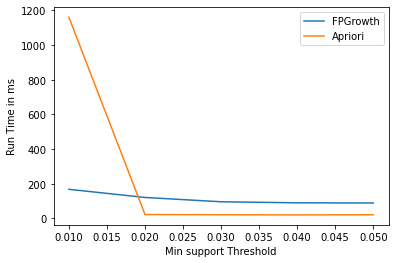

In [109]:
sns.lineplot(x=l,y=f,label="FPGrowth")
sns.lineplot(x=l,y=t,label="Apriori")
plt.xlabel("Min support Threshold")
plt.ylabel("Run Time in ms")

#### Clearly we can see that for low support threshold Apriori takes much more time compared to Fpgrowth